# Hierarchical Clustering

## Importing the libraries

In [523]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [524]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))[:, 1:]

## Using the dendrogram to find the optimal number of clusters

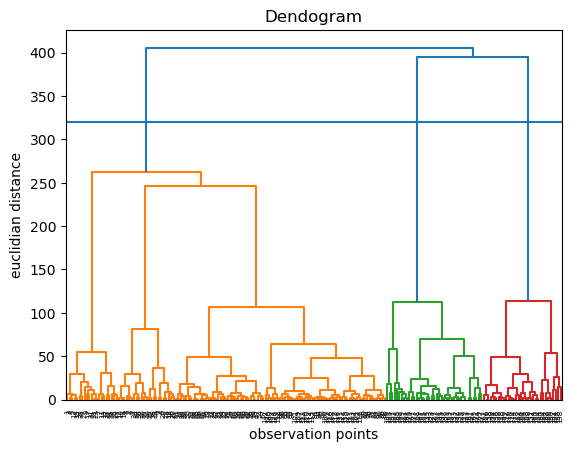

In [525]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method='ward', metric='euclidean'))#, truncate_mode='lastp', p=10
# on travaille avec les coordonnées de distance du dendogram
dendo_df = pd.DataFrame(data=dendogram['dcoord'], columns=('basegauche', 'sommet', 'sommetdroit', 'basedroite'))
dendo_df.drop(['sommetdroit'], axis=1, inplace=True) #sommetdroit = sommet
plt.title('Dendogram')
plt.xlabel('observation points')
plt.ylabel('euclidian distance')
plt.axhline(y=320.2571292928017)

In [526]:
# on calcule les hauteurs sans coupe afin de les comparer
## D'abord on ordonne les sommets
sommet_ordonne=dendo_df['sommet'].sort_values().reset_index(drop=True)
## sommetproche = sommet inférieur le plus proche
dendo_df['sommetproche'] = sommet_ordonne[sommet_ordonne.searchsorted(
    dendo_df[['basegauche', 'basedroite']].max(axis=1), 
    side='right')].values
## dans le cas où aucun sommet inférieur ne vient couper, le sommetproche devient la base la plus haute
arectifier_idx = dendo_df[dendo_df['sommet']==dendo_df['sommetproche']].index
dendo_df.loc[arectifier_idx, 'sommetproche']=dendo_df.loc[arectifier_idx, ['basegauche', 'basedroite']].max(axis=1)

In [527]:
# enfin identifie la hauteur sans coupe la plus grande et on dessine une bare horizentale qui la croise au milieu
coupeposition = dendo_df.loc[
    (dendo_df['sommet']-dendo_df['sommetproche']).sort_values(ascending=False).index[0], 
    ['sommet', 'sommetproche']
].mean()

In [528]:
# on decompte le nombre de bares verticales coupées par cette bare horizentale = n_clusters optimal
coupehaute = dendo_df[dendo_df['sommet'] > coupeposition]
n_clusters = (coupehaute['basegauche'] < coupeposition).sum() + (coupehaute['basedroite'] < coupeposition).sum()

In [529]:
len(np.unique(dendogram['leaves_color_list'])) == n_clusters

True

## Training the Hierarchical Clustering model on the dataset

In [530]:
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(n_clusters=n_clusters)
clusterer.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

## Visualising the clusters